In [6]:
pip install tensorflow

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models,optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop

In [8]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
#normalize data
X_train=X_train/255
X_test=X_test/255

In [10]:
#onehot encoding
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [15]:
#model
def create_model():
  model=models.Sequential([
      layers.Input(shape=(32,32,3)),
      layers.Conv2D(32,(3,3),activation="relu"),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64,(3,3),activation="relu"),
      layers.MaxPooling2D(2,2),
      layers.Flatten(),
      layers.Dense(64,activation="relu"),
      layers.Dense(10,activation="softmax")
  ])
  return model

Adam

In [19]:
model_adam=create_model()
model_adam.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [20]:
m1=model_adam.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3690 - loss: 1.7371 - val_accuracy: 0.5450 - val_loss: 1.2772
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5741 - loss: 1.2183 - val_accuracy: 0.5960 - val_loss: 1.1841
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6348 - loss: 1.0535 - val_accuracy: 0.6520 - val_loss: 1.0002
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6729 - loss: 0.9491 - val_accuracy: 0.6697 - val_loss: 0.9621
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6926 - loss: 0.8851 - val_accuracy: 0.6693 - val_loss: 0.9734
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7086 - loss: 0.8450 - val_accuracy: 0.6792 - val_loss: 0.9267
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7296 - loss: 0.7834 - val_accuracy: 0.6924 - val_loss: 0.9066
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7458 - loss: 0.7429 - val_accuracy: 0.

In [21]:
#evaluate
test_loss,test_accuracy=model_adam.evaluate(X_test,y_test)
print("test accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6945 - loss: 0.9006
test accuracy: 0.6924999952316284


Adagrad

In [22]:
model_adagrad=create_model()
model_adagrad.compile(optimizer="Adagrad",loss="categorical_crossentropy",metrics=['accuracy'])

In [23]:
m2=model_adagrad.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1293 - loss: 2.2926 - val_accuracy: 0.2121 - val_loss: 2.2324
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2309 - loss: 2.1944 - val_accuracy: 0.2718 - val_loss: 2.0754
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2807 - loss: 2.0464 - val_accuracy: 0.3023 - val_loss: 1.9817
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3009 - loss: 1.9750 - val_accuracy: 0.3057 - val_loss: 1.9458
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3161 - loss: 1.9387 - val_accuracy: 0.3248 - val_loss: 1.9127
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3322 - loss: 1.9005 - val_accuracy: 0.3497 - val_loss: 1.8790
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3510 - loss: 1.8653 - val_accuracy: 0.3647 - val_loss: 1.8423
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3589 - loss: 1.8353 - val_accuracy: 0.

In [24]:
test_loss,test_accuracy=model_adagrad.evaluate(X_test,y_test)
print("test accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4002 - loss: 1.7556
test accuracy: 0.39820000529289246


RMSprop

In [25]:
model_rms=create_model()
model_rms.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=['accuracy'])

In [26]:
m3=model_rms.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3511 - loss: 1.7979 - val_accuracy: 0.5266 - val_loss: 1.3141
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5709 - loss: 1.2185 - val_accuracy: 0.5659 - val_loss: 1.3084
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6372 - loss: 1.0392 - val_accuracy: 0.6302 - val_loss: 1.0642
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6855 - loss: 0.9034 - val_accuracy: 0.6549 - val_loss: 1.0016
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7177 - loss: 0.8177 - val_accuracy: 0.6312 - val_loss: 1.0703
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7403 - loss: 0.7485 - val_accuracy: 0.6758 - val_loss: 0.9587
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7666 - loss: 0.6857 - val_accuracy: 0.6067 - val_loss: 1.2720
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7844 - loss: 0.6347 - val_accuracy: 0.

In [27]:
test_loss,test_accuracy=model_rms.evaluate(X_test,y_test)
print("test accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7023 - loss: 0.9295
test accuracy: 0.6984999775886536


SGD

In [28]:
model_sgd=create_model()
model_sgd.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=['accuracy'])

In [29]:
m4=model_sgd.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_train,y_train))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1843 - loss: 2.1988 - val_accuracy: 0.2862 - val_loss: 1.9484
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3230 - loss: 1.8984 - val_accuracy: 0.3550 - val_loss: 1.7773
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3943 - loss: 1.6946 - val_accuracy: 0.4022 - val_loss: 1.6822
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4380 - loss: 1.5670 - val_accuracy: 0.4349 - val_loss: 1.5882
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4782 - loss: 1.4580 - val_accuracy: 0.4813 - val_loss: 1.4476
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4987 - loss: 1.4028 - val_accuracy: 0.4576 - val_loss: 1.5452
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5164 - loss: 1.3543 - val_accuracy: 0.5232 - val_loss: 1.3322
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5384 - loss: 1.3046 - val_accuracy

In [30]:
test_loss,test_accuracy=model_sgd.evaluate(X_test,y_test)
print("test accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5113 - loss: 1.3875
test accuracy: 0.5110999941825867


SGD with momentum

In [31]:
model_momentum=create_model()
sgd_optimizer=SGD(momentum=0.9)
model_momentum.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=['accuracy'])

In [32]:
m5=model_momentum.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1719 - loss: 2.2123 - val_accuracy: 0.2264 - val_loss: 2.1410
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3199 - loss: 1.9020 - val_accuracy: 0.3777 - val_loss: 1.7368
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3973 - loss: 1.6914 - val_accuracy: 0.4106 - val_loss: 1.6753
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4530 - loss: 1.5436 - val_accuracy: 0.4157 - val_loss: 1.6637
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4807 - loss: 1.4583 - val_accuracy: 0.4188 - val_loss: 1.6586
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5119 - loss: 1.3843 - val_accuracy: 0.4998 - val_loss: 1.4187
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5326 - loss: 1.3273 - val_accuracy: 0.5226 - val_loss: 1.3310
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5536 - loss: 1.2759 - val_accuracy: 0.

In [33]:
test_loss,test_accuracy=model_momentum.evaluate(X_test,y_test)
print("test accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5788 - loss: 1.2098
test accuracy: 0.5740000009536743


Adadelta

In [34]:
model_adadelta=create_model()
model_adadelta.compile(optimizer="Adadelta",loss="categorical_crossentropy",metrics=['accuracy'])

In [35]:
m6=model_adadelta.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1010 - loss: 2.3046 - val_accuracy: 0.1064 - val_loss: 2.2950
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1110 - loss: 2.2929 - val_accuracy: 0.1250 - val_loss: 2.2868
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1290 - loss: 2.2856 - val_accuracy: 0.1473 - val_loss: 2.2803
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1552 - loss: 2.2793 - val_accuracy: 0.1696 - val_loss: 2.2738
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1812 - loss: 2.2721 - val_accuracy: 0.1891 - val_loss: 2.2663
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1965 - loss: 2.2649 - val_accuracy: 0.2011 - val_loss: 2.2585
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2085 - loss: 2.2567 - val_accuracy: 0.2079 - val_loss: 2.2502
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2129 - loss: 2.2483 - val_accuracy: 0.

In [36]:
test_loss,test_acuracy=model_adadelta.evaluate(X_test,y_test)
print("test accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2244 - loss: 2.2211
test accuracy: 0.5740000009536743


In [37]:
results = {
    'Adam': m1.history['val_accuracy'][-1],
    'Adagrad': m2.history['val_accuracy'][-1],
    'RMSprop': m3.history['val_accuracy'][-1],
    'SGD': m4.history['val_accuracy'][-1],
    'Momentum': m5.history['val_accuracy'][-1],
    'Adadelta': m6.history['val_accuracy'][-1]
}

In [38]:
results

{'Adam': 0.6924999952316284,
 'Adagrad': 0.39820000529289246,
 'RMSprop': 0.6984999775886536,
 'SGD': 0.5221800208091736,
 'Momentum': 0.5740000009536743,
 'Adadelta': 0.22059999406337738}

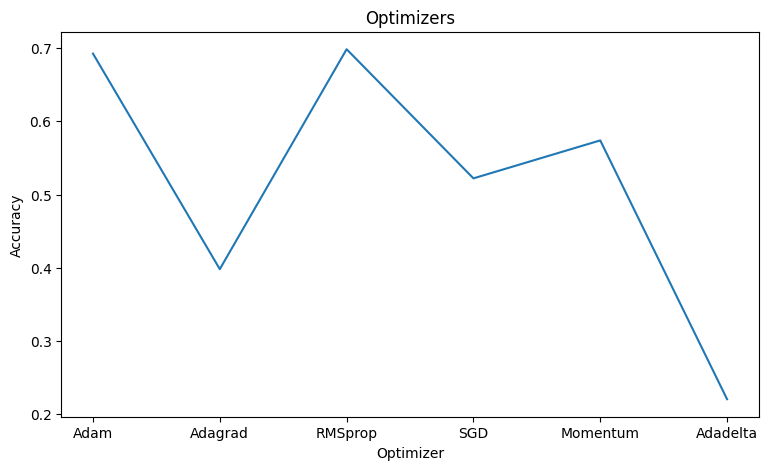

In [39]:
plt.figure(figsize=(9, 5))
plt.plot(results.keys(),results.values())
plt.title('Optimizers')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.show()

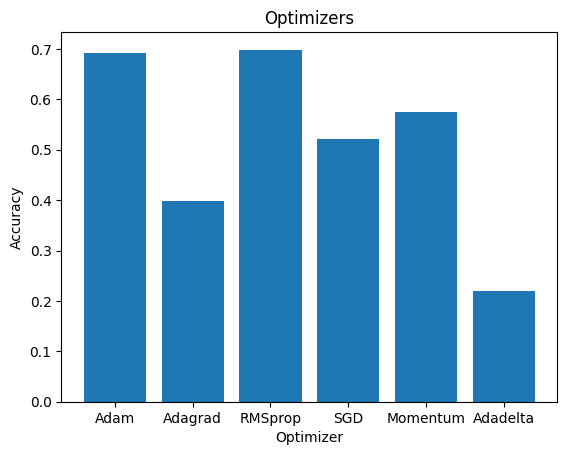

In [40]:
plt.bar(results.keys(), results.values())
plt.title('Optimizers')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.show()